In [1]:
using MAT
using Plots
using Pkg
using LazyGrids

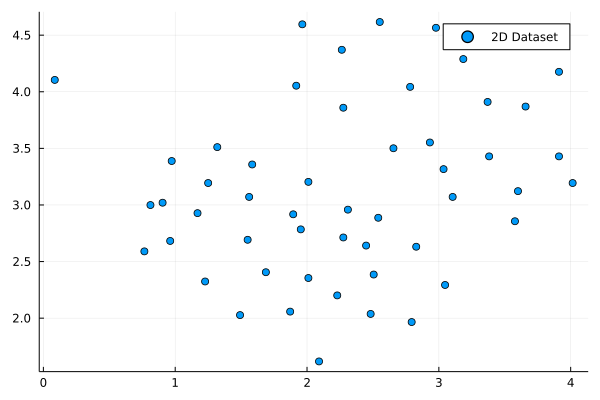

In [2]:
# Loading the training dataset
vars = matread("ex6data1.mat");
X = vars["X"];
Y = vars["y"];
scatter(X[:,1],X[:,2], label="2D Dataset")

In [10]:
X

51×2 Matrix{Float64}:
 1.9643    4.5957
 2.2753    3.8589
 2.9781    4.5651
 2.932     3.5519
 3.5772    2.856
 4.015     3.1937
 3.3814    3.4291
 3.9113    4.1761
 2.7822    4.0431
 2.5518    4.6162
 3.3698    3.9101
 3.1048    3.0709
 1.9182    4.0534
 ⋮         
 0.8122    2.9992
 0.9735    3.3881
 1.25      3.1937
 1.3191    3.5109
 2.2292    2.201
 2.4482    2.6411
 2.7938    1.9656
 2.091     1.6177
 2.5403    2.8867
 0.9044    3.0198
 0.76615   2.5899
 0.086405  4.1045

In [11]:
Y

51×1 Matrix{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0

In [13]:
# Training the model
e = 1e-3
max_passes = 5
m = size(X, 1)
n = size(X, 2)


alphas = zeros(m, 1);
b = 0;
E = zeros(m, 1);
passes = 0;
eta = 0;
L = 0;
H = 0;

K = X*X';
dots = 12;

dots = 12;
while passes < max_passes
            
    num_changed_alphas = 0;
    for i = 1:m
        println(E[i]);
        E[i] = b + sum(alphas.*Y.*K(:,i)) - Y[i];
        
        if ((Y[i]*E[i] < -tol && alphas[i] < C) || (Y[i]*E[i] > tol && alphas[i] > 0))
            

            j = ceil(m * rand());
            while j == i 
                j = ceil(m * rand());
            end

            E[j] = b + sum(alphas.*Y.*K(:,j)) - Y[j];

            alpha_i_old = alphas[i];
            alpha_j_old = alphas[j];
            
            if (Y[i] == Y[j])
                L = max(0, alphas[j] + alphas[i] - C);
                H = min(C, alphas[j] + alphas[i]);
            else
                L = max(0, alphas[j] - alphas[i]);
                H = min(C, C + alphas[j] - alphas[i]);
            end
           
            if (L == H)
                continue;
            end

          
            eta = 2 * K(i,j) - K(i,i) - K(j,j);
            if (eta >= 0)
                continue;
            end
            
            alphas[j] = alphas[j] - (Y[j] * (E[i] - E[j])) / eta;
            
            alphas[j] = min(H, alphas[j]);
            alphas[j] = max(L, alphas[j]);
            
            if (abs(alphas[j] - alpha_j_old) < tol)
                alphas[j] = alpha_j_old;
                continue;
            end
            
            alphas[i] = alphas[i] + Y[i]*Y[j]*(alpha_j_old - alphas[j]);
            
            b1 = b - E[i] - Y[i] * (alphas[i] - alpha_i_old) *  K(i,j)' - Y[j] * (alphas[j] - alpha_j_old) *  K(i,j)';
            b2 = b - E[j] - Y[i] * (alphas[i] - alpha_i_old) *  K(i,j)' - Y[j] * (alphas[j] - alpha_j_old) *  K(j,j)';

            if (0 < alphas[i] && alphas[i] < C)
                b = b1;
            elseif (0 < alphas[j] && alphas[j] < C)
                b = b2;
            else
                b = (b1+b2)/2;
            end

            num_changed_alphas = num_changed_alphas + 1;

        end
        
    end
   if (num_changed_alphas == 0)
        passes = passes + 1;
    else
        passes = 0;
    end

    fprintf('.');
    dots = dots + 1;
    if dots > 78
        dots = 0;
        fprintf('\n');
    end
    if exist("OCTAVE_VERSION")
        fflush(stdout);
    end
end

idx = alphas > 0;
model.X= X(idx,:);
model.y= Y(idx);
model.kernelFunction = kernelFunction;
model.b= b;
model.alphas= alphas(idx);
model.w = ((alphas.*Y)'*X)';

end

0.0

LoadError: MethodError: objects of type Matrix{Float64} are not callable
Use square brackets [] for indexing an Array.

In [49]:
tol = 1e-3
max_passes = 5
C = 1


# Data parameters
m = size(X, 1)
n = size(X, 2)

# Map 0 to -1
# Y[Y==0] = -1

# Variables
alphas = zeros(m, 1)
b = 0
E = zeros(m, 1)
passes = 0
eta = 0
L = 0
H = 0

# Pre-compute the Kernel Matrix since our dataset is small
# (in practice, optimized SVM packages that handle large datasets
#  gracefully will _not_ do this)
# 
# We have implemented optimized vectorized version of the Kernels here so
# that the svm training will run faster.

K = X*X'


# Train
println("\nTraining ...")
dots = 12
while passes .< max_passes
            
    num_changed_alphas = 0
    for i = 1:m
        
        # Calculate Ei = f[x[i]] - y[i] using [2]. 
        # E[i] = b + sum (X[i, :] * (repeat(alphas.*Y,1,n).*X)') - Y[i]
        E[i] = b + sum(alphas.*Y.*K[:,i]) - Y[i]
        
        if ((Y[i]*E[i] < -tol && alphas[i] .< C) || (Y[i]*E[i] > tol && alphas[i] .> 0))
            
            # In practice; there are many heuristics one can use to select
            # the i & j. In this simplified code; we select them randomly.
            j = ceil(m * rand())
            while j .== i;  # Make sure i \neq j
                j = ceil(m * rand())
            end
            j = convert(Int64, round(j, digits=0))
            
            # Calculate Ej = f[x[j]] - y[j] using [2].
            E[j] = b + sum(alphas.*Y.*K[:,j]) - Y[j]

            # Save old alphas
            alpha_i_old = alphas[i]
            alpha_j_old = alphas[j]
            
            # Compute L & H by [10] | [11]. 
            if (Y[i] .== Y[j])
                L = max(0, alphas[j] + alphas[i] - C)
                H = min(C, alphas[j] + alphas[i])
            else()
                L = max(0, alphas[j] - alphas[i])
                H = min(C, C + alphas[j] - alphas[i])
            end
           
            if (L .== H)
                # continue to next i. 
                continue
            end

            # Compute eta by [14].
            eta = 2 * K[i,j] - K[i,i] - K[j,j]
            if (eta >= 0)
                # continue to next i. 
                continue
            end
            
            # Compute and clip new value for alpha j using [12] & [15].
            alphas[j] = alphas[j] - (Y[j] * (E[i] - E[j])) / eta
            
            # Clip
            alphas[j] = min(H, alphas[j])
            alphas[j] = max(L, alphas[j])
            
            # Check if change in alpha is significant
            if (abs(alphas[j] - alpha_j_old) .< tol)
                # continue to next i. 
                # replace anyway
                alphas[j] = alpha_j_old
                continue
            end
            
            # Determine value for alpha i using [16]. 
            alphas[i] = alphas[i] + Y[i]*Y[j]*(alpha_j_old - alphas[j])
            
            # Compute b1 and b2 using [17] & [18] respectively. 
            b1 = b - E[i] - Y[i] * (alphas[i] - alpha_i_old) *  K[i,j]' - Y[j] * (alphas[j] - alpha_j_old) *  K[i,j]'
            b2 = b - E[j] - Y[i] * (alphas[i] - alpha_i_old) *  K[i,j]' - Y[j] * (alphas[j] - alpha_j_old) *  K[j,j]'

            # Compute b by [19]. 
            if (0 < alphas[i] && alphas[i] .< C)
                b = b1
            elseif [0 < alphas[j] && alphas[j] .< C]
                b = b2
            else()
                b = (b1+b2)/2
            end

            num_changed_alphas = num_changed_alphas + 1

        end
        
    end
    
    if (num_changed_alphas .== 0)
        passes = passes + 1
    else()
        passes = 0
    end

    println(".")
    dots = dots + 1
    if dots .> 78
        dots = 0
        println("\n")
    end
end
println(" Done! \n\n")

# Save the model
idx = alphas .> 0
modelX= X[idx,:]
modely= Y[idx]
modelkernelFunction = "linear"
modelb= b
modelalphas= alphas[idx]
modelw = ((alphas.*Y)'*X)'




Training ...
.
.
.
.
.
 Done! 




2×1 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0
 0.0

In [105]:
function pred(modelw, modelb, X)
    if (size(X, 2) .== 1)
        # Examples should be in rows
        X = X'
    end

    # Dataset 
    m = size(X, 1)
    p = zeros(m, 1)
    pred = zeros(m, 1)
    p = X * modelw + modelb

    pred[p >= 0] =  1
    pred[p .<  0] =  0
    return pred 

end

function visualizeBoundaryLinear(X, y, modelw, modelb)
    w = modelw;
    b = modelb;
    xp = linspace(min(X(:,1)), max(X(:,1)), 100);
    yp = - (w(1)*xp + b)/w(2);
    scatter(X, y);
    scatter(xp, yp); 
end


visualizeBoundaryLinear (generic function with 1 method)

In [106]:
using LazyGrids
x1plot = LinRange(min.(X[:,1]), max.(X[:,1]), 100);
x2plot = LinRange(min.(X[:,2]), max.(X[:,2]), 100);


(X1, X2) = ndgrid(x1plot, x2plot);

vals = zeros(size(X1));
for i = 1:size(X1, 2)
    print(i)
    this_X = [X1[:, i], X2[:, i]];
#     println(this_X);
    vals[:, i] = pred(modelw, modelb, this_X);
end
visualizeBoundaryLinear(X,Y,modelw,modelb)

1

LoadError: MethodError: no method matching zero(::Type{Vector{Float64}})
[0mClosest candidates are:
[0m  zero([91m::Union{Type{P}, P}[39m) where P<:Dates.Period at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Dates\src\periods.jl:53
[0m  zero([91m::FixedPointNumbers.FixedPoint[39m) at C:\Users\rohit\.julia\packages\FixedPointNumbers\HAGk2\src\FixedPointNumbers.jl:222
[0m  zero([91m::SparseArrays.AbstractSparseArray[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\SparseArrays\src\SparseArrays.jl:55
[0m  ...

In [102]:
modelb

0